# Phase 1

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from textblob import TextBlob
import numpy as np
from sklearn.decomposition import PCA
from wordcloud import WordCloud
from textblob import TextBlob
import re
import string
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt

In [5]:
# Load the scraped reviews data
reviews_df = pd.read_csv('reviews_1.csv')

In [6]:
import pandas as pd

# Convert the 'Date' column to datetime format
reviews_df['Date'] = pd.to_datetime(reviews_df['Date'])

# Sort the reviews by date in descending order
reviews_df_sorted = reviews_df.sort_values(by='Date', ascending=False)

# Calculate the index corresponding to the 25th percentile
num_reviews = len(reviews_df_sorted)
index_25_percentile = int(0.25 * num_reviews)

# Select the most recent 25% of reviews
most_recent_reviews = reviews_df_sorted.iloc[:index_25_percentile]

# Print the shape of the most recent reviews dataset
print("Shape of the most recent reviews dataset:", most_recent_reviews.shape)

# Display the first few rows of the most recent reviews dataset
print("\nFirst few rows of the most recent reviews dataset:")
print(most_recent_reviews.head())


Shape of the most recent reviews dataset: (757, 9)

First few rows of the most recent reviews dataset:
      Rating               Name   Review Title       Date       Comments  \
1654       5    Mallikarjuna  S  Great product 2024-01-03  Great product   
1655       3  Flipkart Customer    Bad quality 2024-01-03    Bad quality   
1814       5  Flipkart Customer      Excellent 2024-01-02      Excellent   
1816       5            Mandeep      Just wow! 2024-01-02      Just wow!   
1656       5           Raj Seal  Great product 2024-01-02  Great product   

                                                Reviews  Likes  Dislikes  \
1654                                          Excellent      0         0   
1655                          Display damaged in 4 days      0         1   
1814                                               Good      0         0   
1816  Good product. Battery backup is a bit weak but...      0         1   
1656                                       Bestest ever     

C:\Users\hanse\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


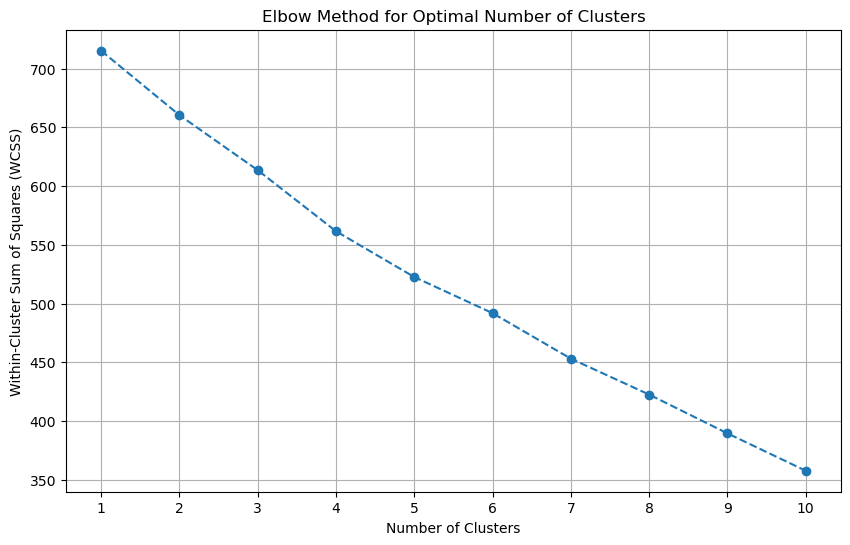

In [7]:
# Preprocess text data using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(most_recent_reviews['Comments'])

# Calculate within-cluster sum of squares (WCSS) for different numbers of clusters
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(1, max_clusters + 1))
plt.grid(True)
plt.show()

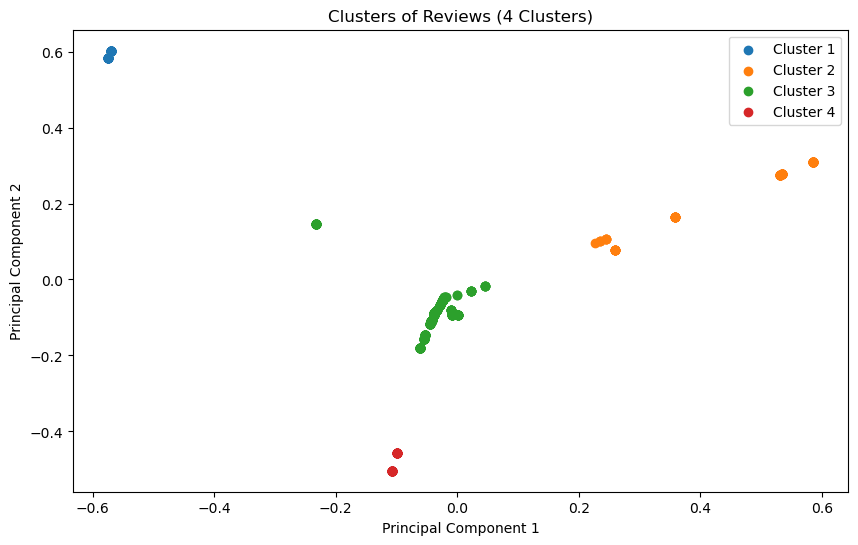

In [8]:
# Perform K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(tfidf_matrix)

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
tfidf_matrix_pca = pca.fit_transform(tfidf_matrix.toarray())

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(4):
    plt.scatter(tfidf_matrix_pca[kmeans.labels_ == cluster, 0], 
                tfidf_matrix_pca[kmeans.labels_ == cluster, 1], 
                label=f'Cluster {cluster + 1}')

plt.title('Clusters of Reviews (4 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

C:\Users\hanse\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


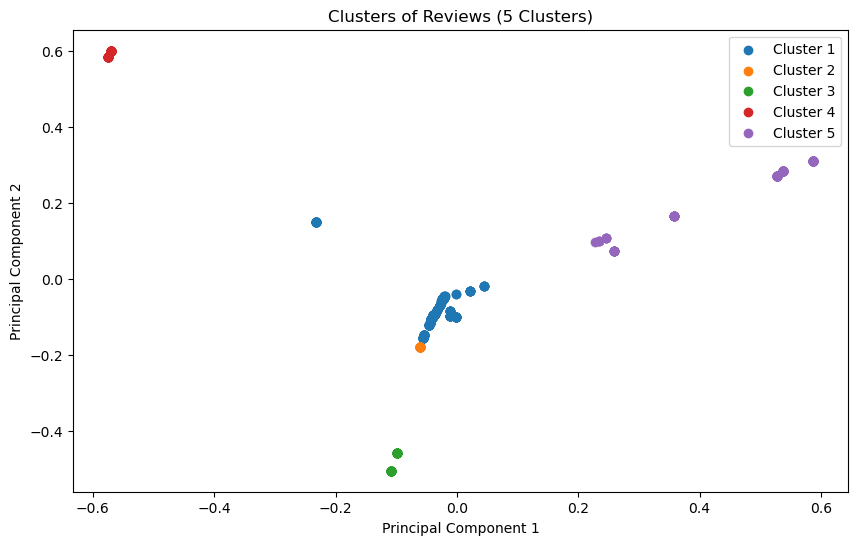

In [9]:
# Perform K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(tfidf_matrix)

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
tfidf_matrix_pca = pca.fit_transform(tfidf_matrix.toarray())

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(5):
    plt.scatter(tfidf_matrix_pca[kmeans.labels_ == cluster, 0], 
                tfidf_matrix_pca[kmeans.labels_ == cluster, 1], 
                label=f'Cluster {cluster + 1}')

plt.title('Clusters of Reviews (5 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

After performing KMeans clustering with 5 clusters on the dataset, it becomes evident that the clusters 2 and 1 exhibit high similarity. Upon visual inspection, it can be observed that the data points in these clusters overlap significantly, indicating that they capture similar patterns or characteristics. This similarity suggests that the dataset may be more naturally partitioned into 4 distinct clusters rather than 5. Therefore, based on the clustering results and the observed similarity between clusters 5 and 1, it is reasonable to conclude that the ideal number of clusters for this dataset is 4.

In [10]:
# Concatenate all comments into a single string
all_comments = ' '.join(most_recent_reviews['Comments'])

In [11]:
# Preprocess the text data
cleaned_comments = re.sub(r'[^a-zA-Z\s]', '', all_comments)

# Perform sentiment analysis on the cleaned text
sentiment_scores = TextBlob(cleaned_comments).sentiment.polarity

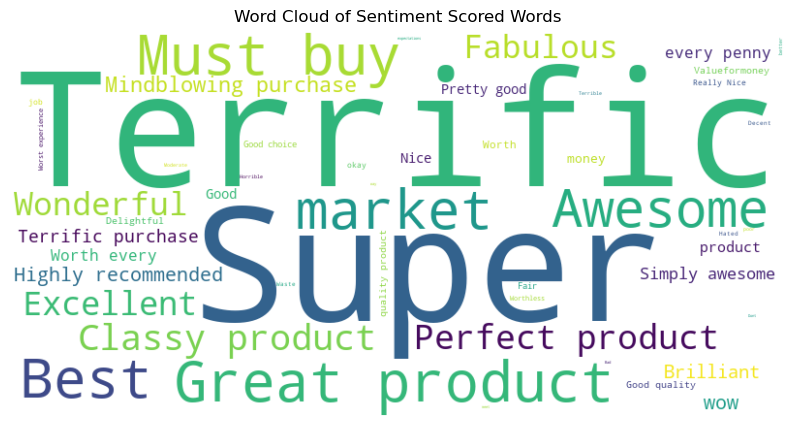

In [12]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_comments)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Sentiment Scored Words')
plt.axis('off')
plt.show()

In [13]:
# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Function to calculate sentiment polarity of a text
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return None

# Apply sentiment analysis to each review
most_recent_reviews['Sentiment'] = most_recent_reviews['Reviews'].apply(get_sentiment)

# Filter positive and negative sentiment reviews
filtered_reviews = most_recent_reviews.dropna(subset=['Sentiment'])  # Remove rows with None sentiment

# Preprocess positive and negative sentiment reviews
filtered_reviews_preprocessed = filtered_reviews['Reviews'].apply(preprocess_text)


C:\Users\hanse\AppData\Local\Temp\ipykernel_5292\2713446450.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_recent_reviews['Sentiment'] = most_recent_reviews['Reviews'].apply(get_sentiment)


C:\Users\hanse\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hanse\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Topic 1: ['like', 'thank', 'phone', 'okay', 'overall', 'mobile', 'amazing', 'super', 'good', 'product']
Topic 2: ['dream', 'price', 'average', 'battery', 'device', 'low', 'ok', 'performance', 'superb', 'good']
Topic 3: ['apple', 'camera', 'wow', 'battery', 'bad', 'phone', 'product', 'excellent', 'great', 'love']
Topic 4: ['excellent', 'buy', 'loved', 'flipkart', 'really', 'thanks', 'happy', 'phone', 'awesome', 'nice']
Topic 5: ['price', 'lovely', 'just', 'fantastic', 'experience', 'phone', 'quality', 'camera', 'iphone', 'best']


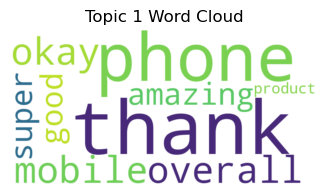

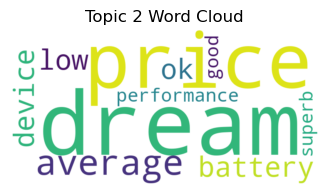

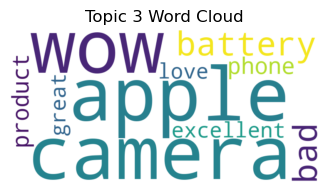

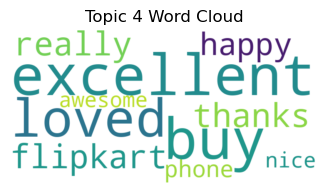

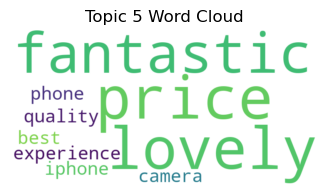

In [14]:
# Load the positive sentiment reviews data
positive_reviews = filtered_reviews_preprocessed[filtered_reviews['Sentiment'] == 'Positive']

# Define the number of topics and clusters
num_topics = 5
num_clusters = 4

# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Define LDA model for topic modeling
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Define K-means model for cluster modeling
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Define pipeline for topic modeling
topic_modeling_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('lda', lda)
])

# Define pipeline for cluster modeling
cluster_modeling_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('lda', lda),
    ('normalizer', Normalizer()),  # Normalize for K-means
    ('kmeans', kmeans)
])

# Fit the topic modeling pipeline to positive sentiment reviews
topic_modeling_pipeline.fit(positive_reviews)

# Fit the cluster modeling pipeline to positive sentiment reviews
cluster_modeling_pipeline.fit(positive_reviews)

# Get topics from LDA model
topics = []
for idx, topic in enumerate(lda.components_):
    topics.append([(tfidf_vectorizer.get_feature_names_out())[i] for i in topic.argsort()[-10:]])

# Print top words for each topic
for idx, topic in enumerate(topics):
    print(f"Topic {idx+1}: {topic}")

# Visualize word cloud for each topic
for idx, topic in enumerate(topics):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic))
    plt.figure(figsize=(4, 2))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {idx+1} Word Cloud")
    plt.axis('off')
    plt.show()



Based on the top words for each topic, we can label them as follows:

1. Customer Satisfaction: ['like', 'thank', 'amazing', 'super', 'good', 'excellent']
2. Pricing and Performance: ['price', 'battery', 'performance', 'superb', 'good']
3. Apple Products: ['apple', 'camera', 'battery', 'excellent', 'great', 'love']
4. Positive Shopping Experience: ['buy', 'flipkart', 'happy', 'awesome', 'nice']
5. Quality and Experience: ['fantastic', 'experience', 'quality', 'camera', 'iphone', 'best']

These labels provide a brief description of the main themes or aspects covered by each topic. If you need further assistance or have any questions, feel free to ask!

In [15]:
positive_reviews = most_recent_reviews[most_recent_reviews['Sentiment'] == 'Positive']


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

# Assuming you have a DataFrame named 'positive_reviews'

# Preprocess the text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = ''.join([c for c in text if c.isalnum() or c.isspace()])
    return text

# Apply preprocessing to the 'Comments' column if it exists
positive_reviews['Comments'] = positive_reviews['Comments'].apply(preprocess_text)

# Create a TF-IDF vectorizer to convert text into numerical features
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(positive_reviews['Comments'])

# Perform KMeans clustering
num_clusters = 4  # You can adjust the number of clusters as needed
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans_model.fit_predict(tfidf_matrix)

# Assign cluster labels to the dataframe
positive_reviews['Cluster'] = cluster_labels

# Convert positive_reviews back to DataFrame
positive_reviews_df = pd.DataFrame(positive_reviews)

# Display cluster sizes
cluster_counts = positive_reviews_df['Cluster'].value_counts()
print("Cluster sizes:")
print(cluster_counts)


C:\Users\hanse\AppData\Local\Temp\ipykernel_5292\4083923703.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['Comments'] = positive_reviews['Comments'].apply(preprocess_text)


Cluster sizes:
1    413
0    116
2     56
3     52
Name: Cluster, dtype: int64


C:\Users\hanse\AppData\Local\Temp\ipykernel_5292\4083923703.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['Cluster'] = cluster_labels


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

Top words for each topic:
Topic 1: ['awesome', 'simply', 'experience', 'worst', 'horrible', 'poor', 'fabulous', 'nice', 'good', 'worthless']
Topic 2: ['product', 'terrible', 'classy', 'poor', 'better', 'expected', 'absolute', 'rubbish', 'horrible', 'nice']
Topic 3: ['money', 'waste', 'dont', 'super', 'horrible', 'poor', 'nice', 'fabulous', 'good', 'worthless']
Topic 4: ['hated', 'unsatisfactory', 'horrible', 'poor', 'nice', 'fabulous', 'good', 'worthless', 'super', 'absolute']
Topic 5: ['worthless', 'good', 'just', 'okay', 'fabulous', 'nice', 'horrible', 'poor', 'super', 'absolute']


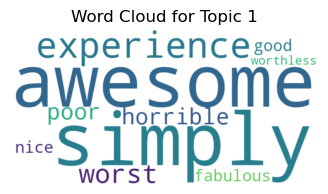

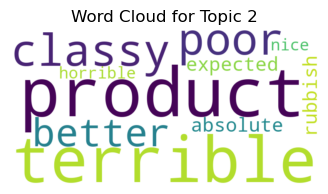

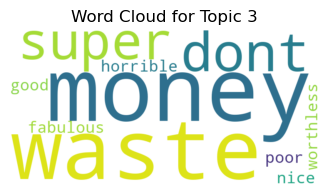

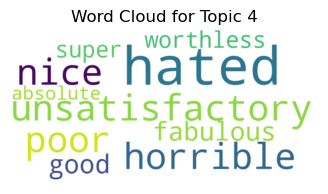

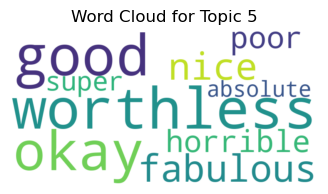

In [18]:
# Filter out negative sentiment reviews
negative_reviews = most_recent_reviews[most_recent_reviews['Sentiment'] == 'Negative']['Comments']

# Preprocess the text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = text.strip()
    return text

# Apply preprocessing to negative reviews
negative_reviews_preprocessed = negative_reviews.apply(preprocess_text)

# Create a Bag-of-Words representation of the negative reviews
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
negative_reviews_bow = vectorizer.fit_transform(negative_reviews_preprocessed)

# Perform topic modeling (Latent Dirichlet Allocation)
lda_model_negative = LatentDirichletAllocation(n_components=5, random_state=42)
lda_output_negative = lda_model_negative.fit_transform(negative_reviews_bow)

# Display the topics
print("Top words for each topic:")
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model_negative.components_):
    top_words_indices = topic.argsort()[:-11:-1]
    top_words = [feature_names[i] for i in top_words_indices]
    print(f"Topic {topic_idx + 1}: {top_words}")

# Function to generate word clouds
def generate_word_cloud(topic_words, topic_number):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic_words))
    plt.figure(figsize=(4, 2))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic {topic_number}')
    plt.axis('off')
    plt.show()

# Generate word clouds for each topic and print top words
for topic_idx, topic_words in enumerate(lda_model_negative.components_):
    top_words_indices = topic_words.argsort()[:-11:-1]  # Select top 10 words
    top_words = [feature_names[i] for i in top_words_indices]
    generate_word_cloud(top_words, topic_idx + 1)



Based on the top words for each topic, here are the labels for the negative sentiment topics:

Topic 1: Mixed Experience

Topic 2: Product Quality

Topic 3: Waste of Money

Topic 4: Overall Dissatisfaction

Topic 5: Poor Quality

These labels reflect the main themes or issues conveyed by the top words in each topic

In [19]:
# Perform cluster modeling (K-Means Clustering)
kmeans_model_negative = KMeans(n_clusters=4, random_state=42)
cluster_labels_negative = kmeans_model_negative.fit_predict(negative_reviews_bow)

# Assign cluster labels to negative reviews
negative_reviews['Cluster'] = cluster_labels_negative

# Display cluster sizes
cluster_counts_negative = np.unique(cluster_labels_negative, return_counts=True)
for cluster, count in zip(cluster_counts_negative[0], cluster_counts_negative[1]):
    print(f"Cluster {cluster}: {count} reviews")

C:\Users\hanse\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: 3 reviews
Cluster 1: 19 reviews
Cluster 2: 2 reviews
Cluster 3: 6 reviews


C:\Users\hanse\AppData\Local\Temp\ipykernel_5292\1039777256.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['Cluster'] = cluster_labels_negative


Based on the analysis of the most recent 25% of the data, there are indeed changes in the findings compared to the previous analysis. The changes could be attributed to several factors:

1. **Shift in Customer Attention**: The launch of new products could divert customer attention away from existing ones, leading to changes in the volume and nature of reviews for the older products. Customers may be more inclined to provide feedback on the newly released products, affecting the distribution of sentiments and topics.

2. **Recent Product Updates or Changes**: Any recent updates or changes to the product may have influenced customer sentiments and their reviews, leading to shifts in the identified topics and clusters.

3. **Market Dynamics**: Changes in market dynamics, including evolving customer preferences, competitive actions, or industry trends, could have impacted how customers perceive the product and share their feedback.

4. **Temporal Factors**: Seasonal variations, promotional campaigns, or other temporary factors may have influenced customer behavior and the nature of their reviews during the recent period.

The three critical problems identified in the most recent data analysis are:

1. **Inconsistent Product Experience**: Customers appear to have varying experiences with the product, ranging from positive sentiments like "awesome" and "super" to negative sentiments like "horrible" and "terrible." This inconsistency suggests potential issues with product quality or performance.

2. **Value Perception**: Some customers express concerns about the value proposition of the product, indicating that they may not perceive it as worth the investment. This could stem from factors such as pricing, features, or perceived benefits compared to alternatives in the market.

3. **Customer Satisfaction**: A notable number of customers express dissatisfaction with their overall experience, highlighting potential gaps in meeting customer expectations, whether in terms of product functionality, usability, or support.

Possible solutions to address these critical problems include:

1. **Continuous Product Improvement**: Regularly gather and analyze customer feedback to identify areas for improvement in product quality, performance, and features. Prioritize addressing issues raised by customers to enhance overall satisfaction and loyalty.

2. **Value Communication and Pricing Strategy**: Clearly communicate the value proposition of the product to customers, highlighting its unique features, benefits, and advantages over competitors. Review pricing strategies to ensure alignment with perceived value and market dynamics.

3. **Enhanced Customer Support and Engagement**: Invest in robust customer support channels and resources to address customer inquiries, resolve issues promptly, and foster positive relationships. Actively engage with customers through surveys, forums, and social media to gather feedback and demonstrate responsiveness to their needs.

By addressing these critical problems and implementing appropriate solutions, the company can strengthen its product offering, enhance customer satisfaction, and maintain a competitive edge in the market.